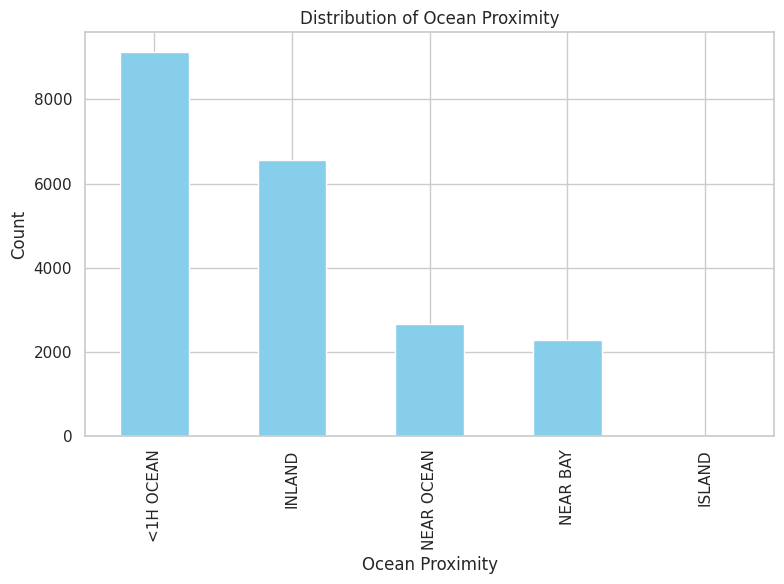

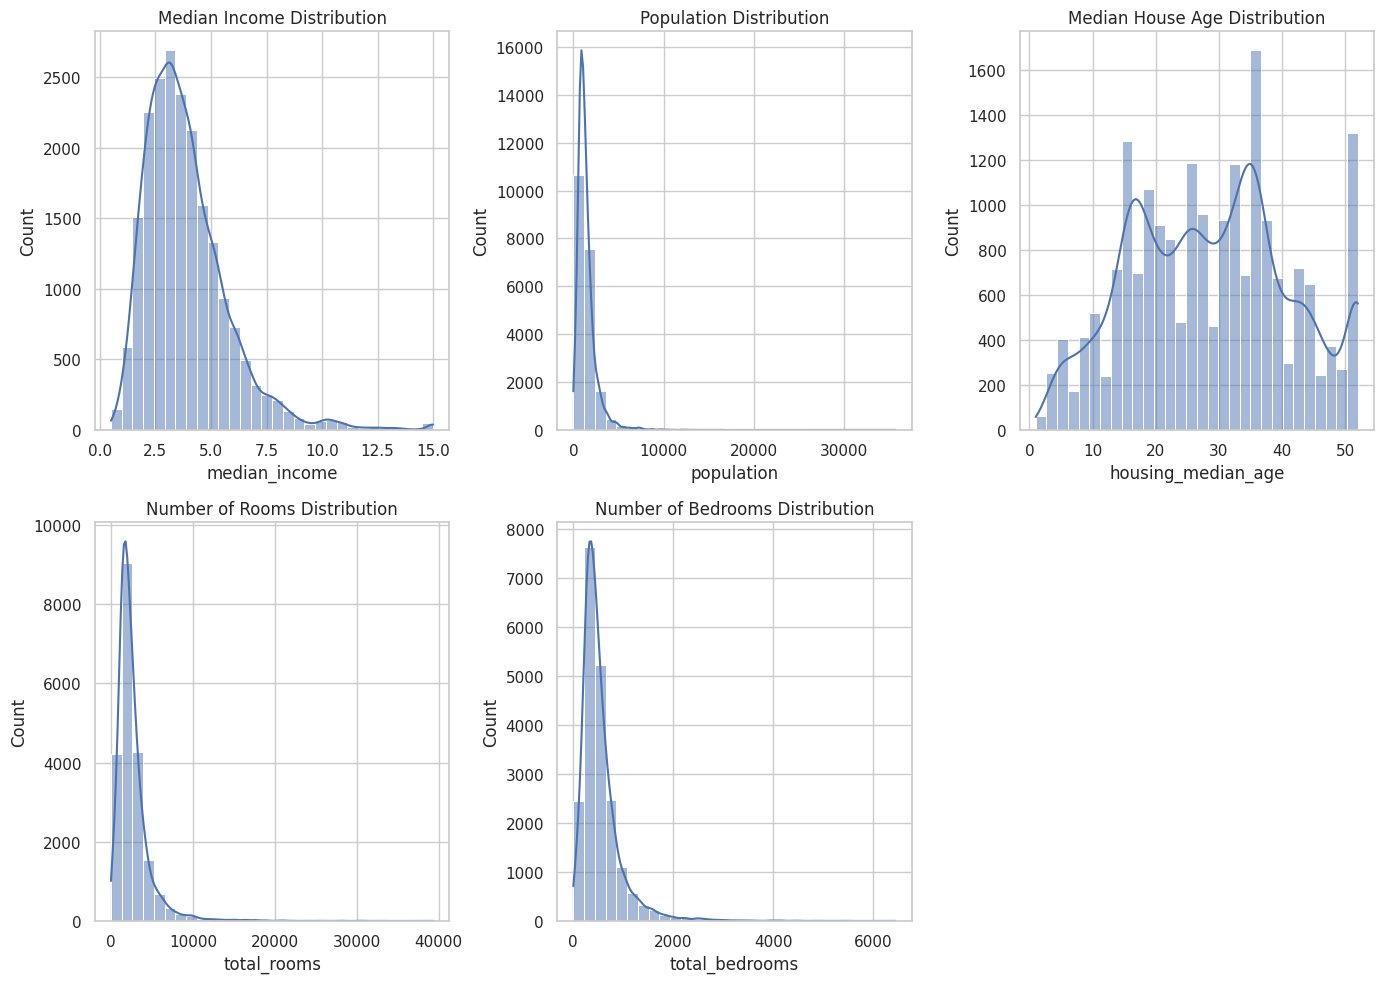

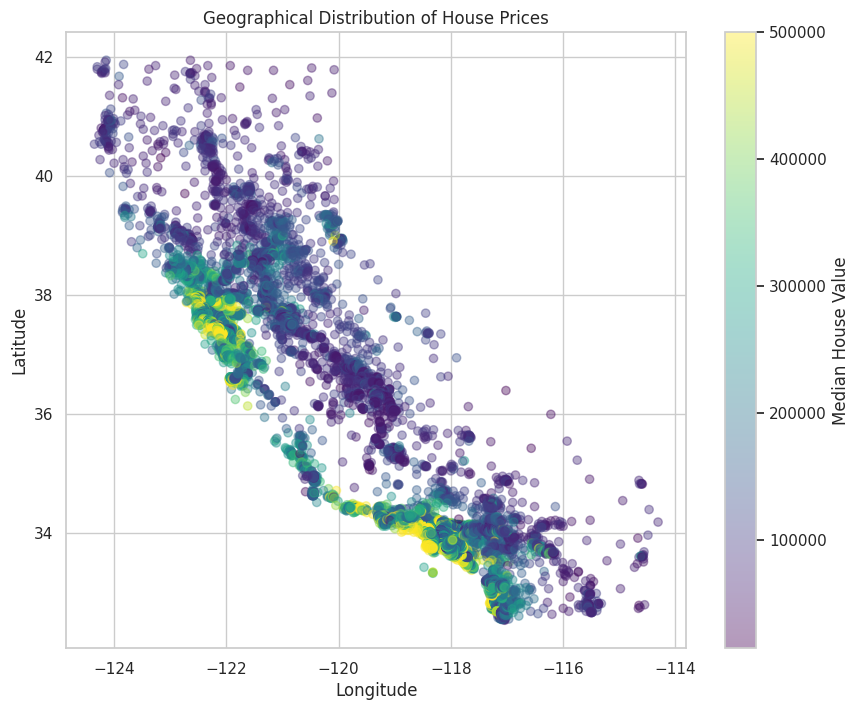

In [167]:

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
# Load the dataset
df = pd.read_csv('housing.csv')

# Count the occurrences of each category in 'ocean_proximity'
ocean_counts = df['ocean_proximity'].value_counts()

# Plotting the bar plot
plt.figure(figsize=(8, 6))
ocean_counts.plot(kind='bar', color='skyblue')

# Adding labels and title
plt.xlabel('Ocean Proximity')
plt.ylabel('Count')
plt.title('Distribution of Ocean Proximity')

# Show plot
plt.tight_layout()
plt.show()

# Example visualizations
sns.set(style="whitegrid")

# Numerical features
plt.figure(figsize=(14, 10))

plt.subplot(2, 3, 1)
sns.histplot(df['median_income'], bins=30, kde=True)
plt.title('Median Income Distribution')

plt.subplot(2, 3, 2)
sns.histplot(df['population'], bins=30, kde=True)
plt.title('Population Distribution')

plt.subplot(2, 3, 3)
sns.histplot(df['housing_median_age'], bins=30, kde=True)
plt.title('Median House Age Distribution')

plt.subplot(2, 3, 4)
sns.histplot(df['total_rooms'], bins=30, kde=True)
plt.title('Number of Rooms Distribution')

plt.subplot(2, 3, 5)
sns.histplot(df['total_bedrooms'], bins=30, kde=True)
plt.title('Number of Bedrooms Distribution')

plt.tight_layout()
plt.show()



# Latitude vs. Longitude (scatter plot)
plt.figure(figsize=(10, 8))
plt.scatter(df['longitude'], df['latitude'], alpha=0.4, c=df['median_house_value'], cmap='viridis')
plt.colorbar(label='Median House Value')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Geographical Distribution of House Prices')
plt.show()













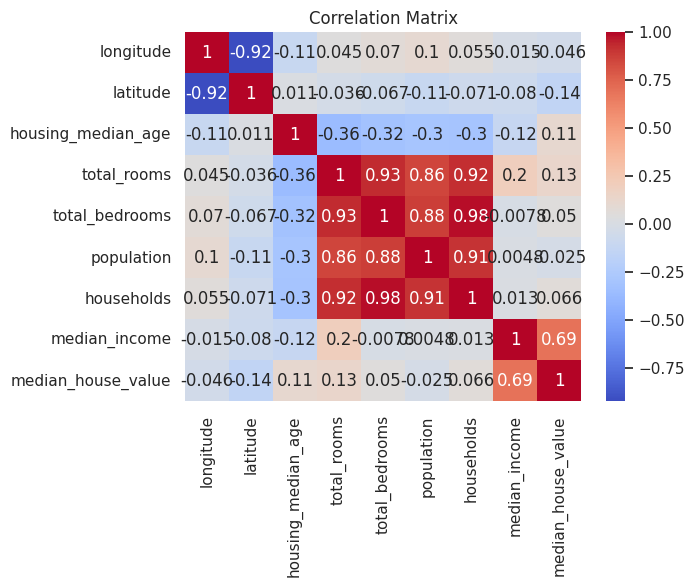

In [168]:
numeric_features = df.select_dtypes(include='number')
correlation_matrix = numeric_features.corr()

# Generate a heatmap
sns.heatmap(correlation_matrix , annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


In [169]:
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41,880,129.0,322,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21,7099,1106.0,2401,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52,1467,190.0,496,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52,1274,235.0,558,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52,1627,280.0,565,NaN,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25,1665,374.0,845,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18,697,150.0,356,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17,2254,485.0,1007,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18,1860,409.0,741,349.0,1.8672,84700.0,INLAND


In [170]:
df.info()
missing_count = df.isnull().sum()
print(missing_count)
x=df
x.dropna()
x



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  int64  
 3   total_rooms         20640 non-null  int64  
 4   total_bedrooms      20429 non-null  float64
 5   population          20640 non-null  int64  
 6   households          20636 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20638 non-null  float64
 9   ocean_proximity     20637 non-null  object 
dtypes: float64(6), int64(3), object(1)
memory usage: 1.6+ MB
longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        211
population              0
households              4
median_income           0
median_house_value      2
ocean_p

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41,880,129.0,322,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21,7099,1106.0,2401,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52,1467,190.0,496,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52,1274,235.0,558,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52,1627,280.0,565,NaN,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25,1665,374.0,845,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18,697,150.0,356,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17,2254,485.0,1007,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18,1860,409.0,741,349.0,1.8672,84700.0,INLAND


In [171]:
missing_count11 = df.isnull().sum()
print(missing_count11)

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        211
population              0
households              4
median_income           0
median_house_value      2
ocean_proximity         3
dtype: int64


In [172]:
y=df
y.dropna(axis=1)
y.isnull().sum()




longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        211
population              0
households              4
median_income           0
median_house_value      2
ocean_proximity         3
dtype: int64

In [173]:
y

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41,880,129.0,322,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21,7099,1106.0,2401,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52,1467,190.0,496,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52,1274,235.0,558,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52,1627,280.0,565,NaN,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25,1665,374.0,845,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18,697,150.0,356,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17,2254,485.0,1007,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18,1860,409.0,741,349.0,1.8672,84700.0,INLAND


In [174]:
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41,880,129.0,322,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21,7099,1106.0,2401,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52,1467,190.0,496,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52,1274,235.0,558,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52,1627,280.0,565,NaN,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25,1665,374.0,845,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18,697,150.0,356,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17,2254,485.0,1007,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18,1860,409.0,741,349.0,1.8672,84700.0,INLAND


In [175]:
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        211
population              0
households              4
median_income           0
median_house_value      2
ocean_proximity         3
dtype: int64

In [176]:

numeric_columns = df.select_dtypes(include=['number']).columns
df[numeric_columns] = df[numeric_columns].fillna(df[numeric_columns].mean())
categorical_columns = df.select_dtypes(include=['object', 'category']).columns
df[categorical_columns] = df[categorical_columns].fillna(df[categorical_columns]
                                                         .mode())
print("Missing values after filling:")
print(df.isnull().sum())


Missing values after filling:
longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       3
dtype: int64


In [177]:
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41,880,129.0,322,126.000000,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21,7099,1106.0,2401,1138.000000,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52,1467,190.0,496,177.000000,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52,1274,235.0,558,219.000000,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52,1627,280.0,565,499.575111,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25,1665,374.0,845,330.000000,1.5603,78100.0,INLAND
20636,-121.21,39.49,18,697,150.0,356,114.000000,2.5568,77100.0,INLAND
20637,-121.22,39.43,17,2254,485.0,1007,433.000000,1.7000,92300.0,INLAND
20638,-121.32,39.43,18,1860,409.0,741,349.000000,1.8672,84700.0,INLAND


In [178]:
import pandas as pd
q=df
# Assuming df is your DataFrame containing categorical columns with missing values
categorical_columns = q.select_dtypes(include=['object', 'category']).columns

# Fill missing values with the mode of each categorical column
for col in categorical_columns:
    q[col].fillna(q[col].mode()[0], inplace=True)


In [179]:
df.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

In [180]:
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41,880,129.0,322,126.000000,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21,7099,1106.0,2401,1138.000000,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52,1467,190.0,496,177.000000,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52,1274,235.0,558,219.000000,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52,1627,280.0,565,499.575111,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25,1665,374.0,845,330.000000,1.5603,78100.0,INLAND
20636,-121.21,39.49,18,697,150.0,356,114.000000,2.5568,77100.0,INLAND
20637,-121.22,39.43,17,2254,485.0,1007,433.000000,1.7000,92300.0,INLAND
20638,-121.32,39.43,18,1860,409.0,741,349.000000,1.8672,84700.0,INLAND


In [181]:


w=df
numeric_columns = w.select_dtypes(include=['number']).columns
df[numeric_columns] = w[numeric_columns].fillna(w[numeric_columns].median())
categorical_columns = w.select_dtypes(include=['object', 'category']).columns
w[categorical_columns] = w[categorical_columns].fillna(w[categorical_columns].mode())
w['total_bedrooms'].fillna(w['total_bedrooms'].mode())

0         129.0
1        1106.0
2         190.0
3         235.0
4         280.0
          ...  
20635     374.0
20636     150.0
20637     485.0
20638     409.0
20639     616.0
Name: total_bedrooms, Length: 20640, dtype: float64

In [182]:
e=df
numeric_columns = e.select_dtypes(include=['number']).columns
e[numeric_columns] = e[numeric_columns].fillna(e[numeric_columns].mode())


In [183]:
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41,880,129.0,322,126.000000,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21,7099,1106.0,2401,1138.000000,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52,1467,190.0,496,177.000000,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52,1274,235.0,558,219.000000,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52,1627,280.0,565,499.575111,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25,1665,374.0,845,330.000000,1.5603,78100.0,INLAND
20636,-121.21,39.49,18,697,150.0,356,114.000000,2.5568,77100.0,INLAND
20637,-121.22,39.43,17,2254,485.0,1007,433.000000,1.7000,92300.0,INLAND
20638,-121.32,39.43,18,1860,409.0,741,349.000000,1.8672,84700.0,INLAND


In [184]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
df['ocean_proximity_encoded'] = encoder.fit_transform(df[['ocean_proximity']])
df


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,ocean_proximity_encoded
0,-122.23,37.88,41,880,129.0,322,126.000000,8.3252,452600.0,NEAR BAY,3
1,-122.22,37.86,21,7099,1106.0,2401,1138.000000,8.3014,358500.0,NEAR BAY,3
2,-122.24,37.85,52,1467,190.0,496,177.000000,7.2574,352100.0,NEAR BAY,3
3,-122.25,37.85,52,1274,235.0,558,219.000000,5.6431,341300.0,NEAR BAY,3
4,-122.25,37.85,52,1627,280.0,565,499.575111,3.8462,342200.0,NEAR BAY,3
...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25,1665,374.0,845,330.000000,1.5603,78100.0,INLAND,1
20636,-121.21,39.49,18,697,150.0,356,114.000000,2.5568,77100.0,INLAND,1
20637,-121.22,39.43,17,2254,485.0,1007,433.000000,1.7000,92300.0,INLAND,1
20638,-121.32,39.43,18,1860,409.0,741,349.000000,1.8672,84700.0,INLAND,1


In [185]:
from sklearn.preprocessing import OneHotEncoder
r=df
c = OneHotEncoder()
housing_encoded = c.fit_transform(r[['ocean_proximity']])
df_encoded = pd.DataFrame(housing_encoded.toarray(), columns=c.get_feature_names_out(['ocean_proximity']))
df_encoded

,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...
20635,0.0,1.0,0.0,0.0,0.0
20636,0.0,1.0,0.0,0.0,0.0
20637,0.0,1.0,0.0,0.0,0.0
20638,0.0,1.0,0.0,0.0,0.0


In [186]:
from sklearn.preprocessing import MinMaxScaler


scaler = MinMaxScaler()

# Fit and transform the data
df_scaled = scaler.fit_transform(df[numeric_columns])

# Convert scaled data back to DataFrame
df_scaled = pd.DataFrame(df_scaled, columns=numeric_columns)

df_scaled

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,0.211155,0.567481,0.784314,0.022331,0.019863,0.008941,0.020556,0.539668,0.902266
1,0.212151,0.565356,0.392157,0.180503,0.171477,0.067210,0.186976,0.538027,0.708247
2,0.210159,0.564293,1.000000,0.037260,0.029330,0.013818,0.028943,0.466028,0.695051
3,0.209163,0.564293,1.000000,0.032352,0.036313,0.015555,0.035849,0.354699,0.672783
4,0.209163,0.564293,1.000000,0.041330,0.043296,0.015752,0.081989,0.230776,0.674638
...,...,...,...,...,...,...,...,...,...
20635,0.324701,0.737513,0.470588,0.042296,0.057883,0.023599,0.054103,0.073130,0.130105
20636,0.312749,0.738576,0.333333,0.017676,0.023122,0.009894,0.018582,0.141853,0.128043
20637,0.311753,0.732200,0.313725,0.057277,0.075109,0.028140,0.071041,0.082764,0.159383
20638,0.301793,0.732200,0.333333,0.047256,0.063315,0.020684,0.057227,0.094295,0.143713


In [187]:
print(df_scaled)

       longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0       0.211155  0.567481            0.784314     0.022331        0.019863   
1       0.212151  0.565356            0.392157     0.180503        0.171477   
2       0.210159  0.564293            1.000000     0.037260        0.029330   
3       0.209163  0.564293            1.000000     0.032352        0.036313   
4       0.209163  0.564293            1.000000     0.041330        0.043296   
...          ...       ...                 ...          ...             ...   
20635   0.324701  0.737513            0.470588     0.042296        0.057883   
20636   0.312749  0.738576            0.333333     0.017676        0.023122   
20637   0.311753  0.732200            0.313725     0.057277        0.075109   
20638   0.301793  0.732200            0.333333     0.047256        0.063315   
20639   0.309761  0.725824            0.294118     0.070782        0.095438   

       population  households  median_income  media

In [188]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Assuming X and Y are prepared correctly
X = df_scaled.drop('median_house_value', axis=1)  # Features
Y = df_scaled['median_house_value']  # Target variable

# Split data into train and test sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Initialize linear regression model
model = LinearRegression()

# Train the model
model.fit(X_train, Y_train)

# Make predictions
Y_pred = model.predict(X_test)
Y_train_pred = model.predict(X_train)
# Evaluate the model
mse = mean_squared_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)

mse2 = mean_squared_error(Y_train, Y_train_pred)
r22 = r2_score(Y_train, Y_train_pred)

print(f"Mean Squared Error for test: {mse}")
print(f"R-squared for test: {r2}")

print(f"Mean Squared Error for train: {mse2}")
print(f"R-squared for train: {r22}")


Mean Squared Error for test: 0.021477517927967267
R-squared for test: 0.6144645751848599
Mean Squared Error for train: 0.020455469611436006
R-squared for train: 0.6400503021123505


In [189]:
# prompt: root mean square error

import numpy as np
from sklearn.metrics import mean_squared_error

# Calculate root mean squared error
rmse = np.sqrt(mean_squared_error(Y_test, Y_pred))

print(f"Root Mean Squared Error (RMSE): {rmse}")


Root Mean Squared Error (RMSE): 0.1465520997050785
